### 热图/矩阵数据的可视化
- https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib
- [annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html)
- [Matshow](https://matplotlib.org/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py)
- [seaborn.heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

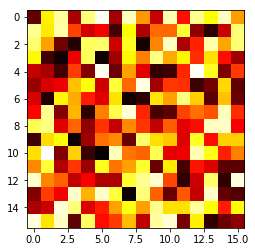

In [3]:
a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

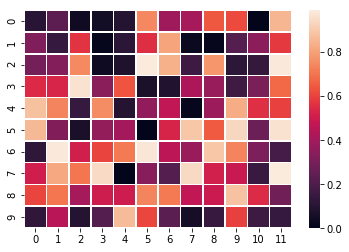

In [4]:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

#### Change the limits of the colormap:

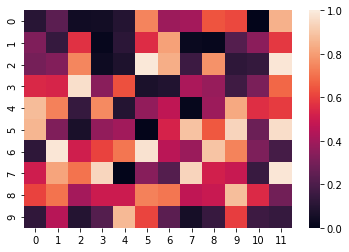

In [5]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

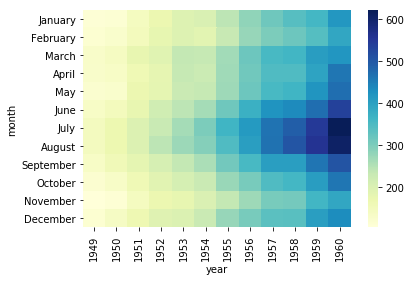

In [6]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, cmap="YlGnBu")

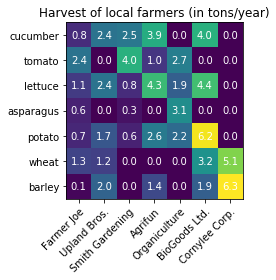

In [7]:
# https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]


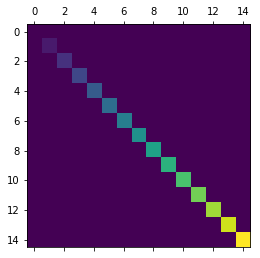

In [10]:
# https://matplotlib.org/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py
def samplemat(dims):
    """Make a matrix with all zeros and increasing elements on the diagonal"""
    aa = np.zeros(dims)
    for i in range(min(dims)):
        aa[i, i] = i
    return aa

print(samplemat((3, 3)))
# Display matrix
plt.matshow(samplemat((15, 15)))

plt.show()

### heatmap with clustering
- [Discovering structure in heatmap data](http://seaborn.pydata.org/examples/structured_heatmap.html)

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Load the brain networks example dataset
# we can set multiple rows as header
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [3]:
df.columns.get_level_values("network")

Index(['1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '6', '6',
       '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '9', '9',
       '10', '10', '11', '11', '12', '12', '12', '12', '12', '13', '13', '13',
       '13', '13', '13', '14', '14', '15', '15', '16', '16', '16', '16', '16',
       '16', '16', '16', '17', '17', '17', '17', '17', '17', '17'],
      dtype='object', name='network')

In [4]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))  # convert to int
df = df.loc[:, used_columns]
df.head()

network          1                     5                     6             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1        55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2        60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3        18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4        -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 38 columns]

In [5]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_lut

{'1': [0.8167028311697733, 0.5345122109266688, 0.5750280113923723],
 '5': [0.7256380093027939, 0.5865684184445076, 0.45124969098702544],
 '6': [0.601243246823196, 0.6281411529879642, 0.44959498566071004],
 '7': [0.4542447259142938, 0.6576596537208662, 0.5136454208930035],
 '8': [0.46712078684915886, 0.6454760674453914, 0.6277122757100324],
 '12': [0.47926472337389664, 0.6333002959568218, 0.7177878822401069],
 '13': [0.6254162090818173, 0.5854245228463807, 0.7893617517727602],
 '17': [0.7949032004362239, 0.5232533686100532, 0.7424428586524288]}

In [6]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)
networks, network_colors

(Index(['1', '1', '5', '5', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7',
        '8', '8', '8', '8', '8', '8', '12', '12', '12', '12', '12', '13', '13',
        '13', '13', '13', '13', '17', '17', '17', '17', '17', '17', '17'],
       dtype='object', name='network'), network  node  hemi
 1        1     lh      [0.8167028311697733, 0.5345122109266688, 0.575...
                rh      [0.8167028311697733, 0.5345122109266688, 0.575...
 5        1     lh      [0.7256380093027939, 0.5865684184445076, 0.451...
                rh      [0.7256380093027939, 0.5865684184445076, 0.451...
 6        1     lh      [0.601243246823196, 0.6281411529879642, 0.4495...
                rh      [0.601243246823196, 0.6281411529879642, 0.4495...
          2     lh      [0.601243246823196, 0.6281411529879642, 0.4495...
                rh      [0.601243246823196, 0.6281411529879642, 0.4495...
 7        1     lh      [0.4542447259142938, 0.6576596537208662, 0.513...
                rh      [0.45424472591429

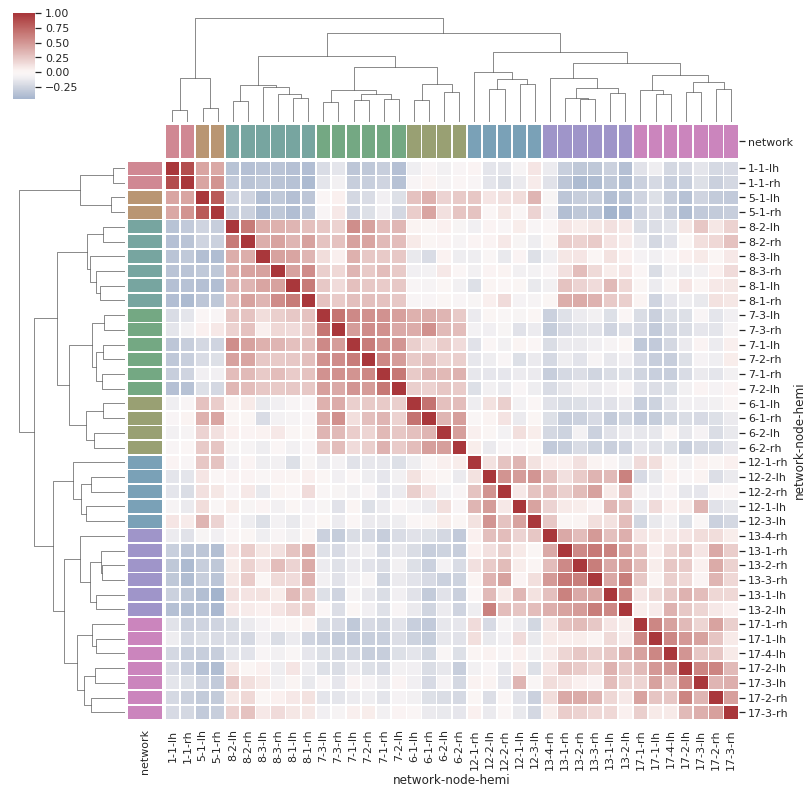

In [11]:
# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

In [12]:
test_data = pd.read_csv('corr_table.csv', index_col='id')

In [13]:
test_data.head()

,82534,56609,98107,15979,53576,16002,24741,16164,27495,12552,...,15143,15935,68126,15133,15142,47588,54762,13030,17288,37517
id,,,,,,,,,,,,,,,,,,,,,
1,0.033230,0.457728,0.310686,0.387782,0.501711,0.431542,0.368901,0.404769,0.384876,0.440903,...,-0.507570,-0.346800,-0.331376,-0.404248,-0.405956,-0.455924,-0.440885,-0.344266,-0.062571,-0.007037
2,0.014797,0.406635,0.207604,0.389375,0.444986,0.339923,0.354984,0.385773,0.476770,0.544757,...,-0.554236,-0.396561,-0.349324,-0.427515,-0.400618,-0.497166,-0.366798,-0.447437,-0.026298,0.109394
3,0.106407,0.322363,0.243061,0.410620,0.417387,0.537483,0.408932,0.427587,0.479041,0.520509,...,-0.526469,-0.386192,-0.416141,-0.486354,-0.548541,-0.362495,-0.369816,-0.482320,-0.162849,-0.100410
4,0.244684,0.378543,0.123375,0.457648,0.397086,0.425057,0.408538,0.490383,0.521108,0.497488,...,-0.561374,-0.453659,-0.473581,-0.559689,-0.506242,-0.444626,-0.483095,-0.414149,-0.196543,-0.111112
5,0.135217,0.444286,0.266314,0.480001,0.466800,0.458809,0.461130,0.521191,0.499861,0.567387,...,-0.533282,-0.416881,-0.510867,-0.549451,-0.450424,-0.477005,-0.448242,-0.428434,-0.135291,-0.066139


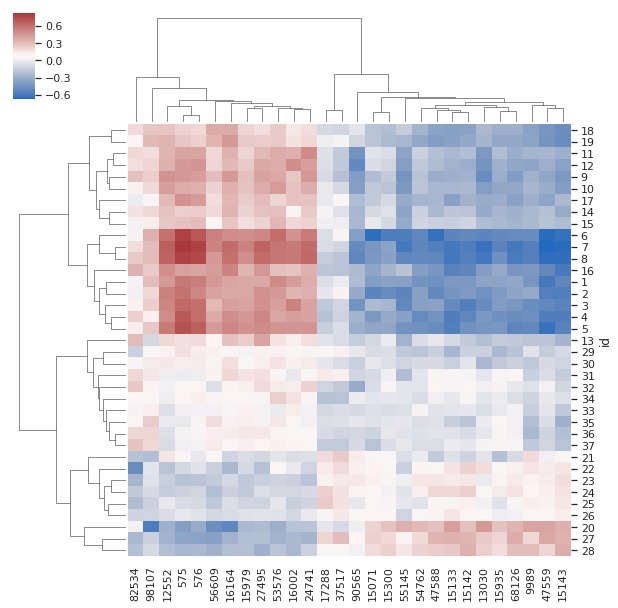

In [17]:
sns_plot = sns.clustermap(test_data, cmap="vlag")
sns_plot.savefig('clustering.png', dpi=300)

#### get the index of clustered name

In [19]:
print([i.get_text() for i in list(sns_plot.ax_heatmap.get_yticklabels())])

['18', '19', '11', '12', '9', '10', '17', '14', '15', '6', '7', '8', '16', '1', '2', '3', '4', '5', '13', '29', '30', '31', '32', '34', '33', '35', '36', '37', '21', '22', '23', '24', '25', '26', '20', '27', '28']


In [20]:
print([i.get_text() for i in list(sns_plot.ax_heatmap.get_xticklabels())])

['82534', '98107', '12552', '575', '576', '56609', '16164', '15979', '27495', '53576', '16002', '24741', '17288', '37517', '90565', '15071', '15300', '55145', '54762', '47588', '15133', '15142', '13030', '15935', '68126', '9989', '47559', '15143']
